In [1]:
import matplotlib.pyplot as plt
import json
from Bio import SeqIO
import math
import subprocess


In [2]:
clusters = [
    len(r.seq)
    for r in SeqIO.parse("../large_data/longest_seqs_from_clusters.fasta", "fasta")
]
homologues = [
    len(r.seq) for r in SeqIO.parse("../large_data/homologues.fasta", "fasta")
]
orfs = [len(r.seq) for r in SeqIO.parse("../large_data/orfs.fasta", "fasta")]


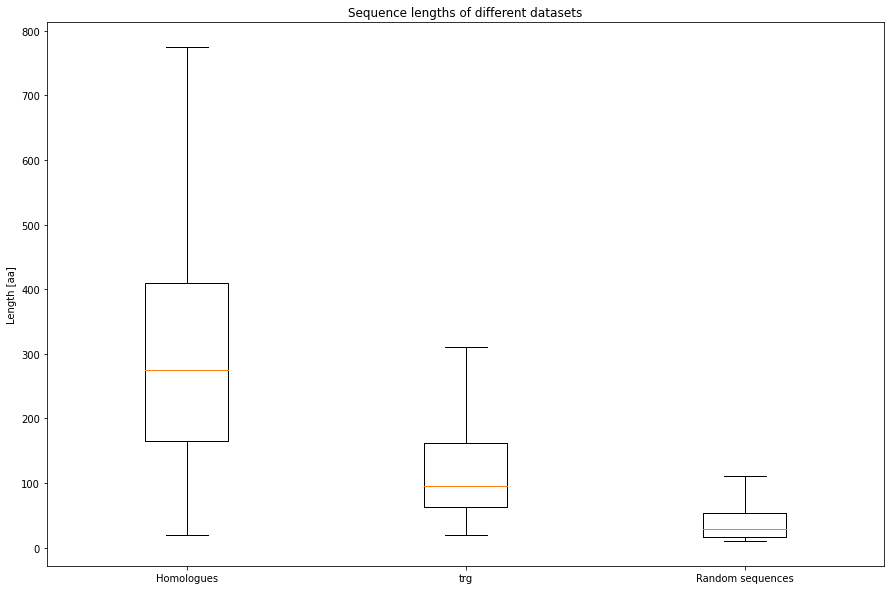

In [3]:
plt.gcf().set_size_inches(15, 10)
plt.title("Sequence lengths of different datasets")
plt.ylabel("Length [aa]")
plt.boxplot(x=[homologues, clusters, orfs], showfliers=False)
plt.xticks([1, 2, 3], ["Homologues", "trg", "Random sequences"])
plt.show()


In [4]:
def shannon_entropy(seq_list):
    unique_aminoacids = set(seq_list)
    M = float(len(seq_list))
    entropy_list = []
    for aa in unique_aminoacids:
        n_i = seq_list.count(aa)
        P_i = n_i / M
        entropy_i = P_i * (math.log(P_i, 2))
        entropy_list.append(entropy_i)

    sh_entropy = -(sum(entropy_list))

    return sh_entropy


In [5]:
clusters_seq = [
    r.seq
    for r in SeqIO.parse("../large_data/longest_seqs_from_clusters.fasta", "fasta")
]
homologues_seq = [r.seq for r in SeqIO.parse("../large_data/homologues.fasta", "fasta")]
orfs_seq = [r.seq for r in SeqIO.parse("../large_data/orfs.fasta", "fasta")]


In [6]:
homologues_entropy = [shannon_entropy(list(seq)) for seq in homologues_seq]


In [7]:
clusters_entropy = [shannon_entropy(list(seq)) for seq in clusters_seq]


In [8]:
orfs_entropy = [shannon_entropy(list(seq)) for seq in orfs_seq]


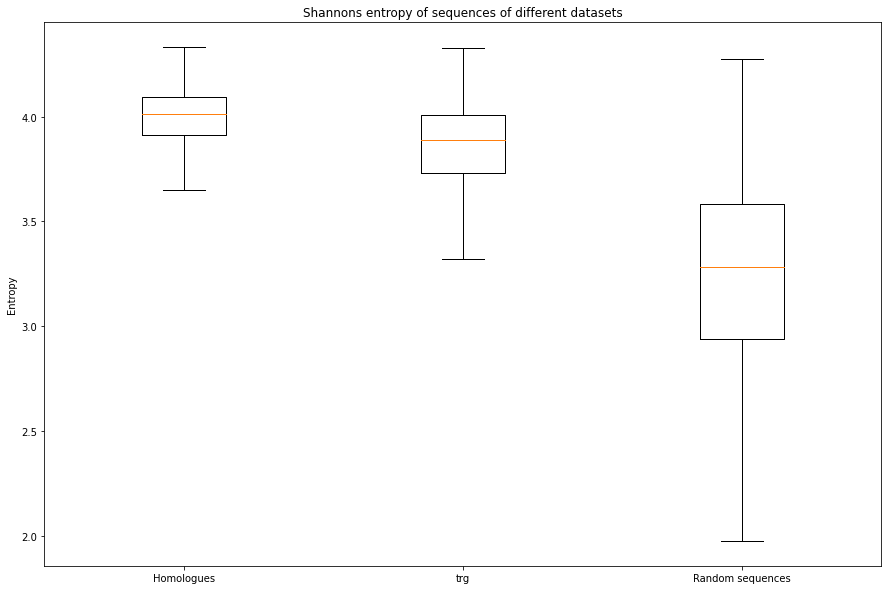

In [9]:
plt.gcf().set_size_inches(15, 10)
plt.title("Shannons entropy of sequences of different datasets")
plt.ylabel("Entropy")
plt.boxplot(x=[homologues_entropy, clusters_entropy, orfs_entropy], showfliers=False)
plt.xticks([1, 2, 3], ["Homologues", "trg", "Random sequences"])
plt.show()
